<a href="https://colab.research.google.com/github/Arthur-B/docs-ml/blob/master/rosenblatt_perceptron_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rosenblatt's perceptron


Implement the Rosenblatt's perceptron as described in Haykin, Chap. 1
We tried to keep the same structure ("update weight", "train") as used in the
regression section.

## Neuron Model

### 2D example

While neural networks developed really quickly recently due to advances in computer hardware, the idea of an artificial neuron goes back to 1943 where McCulloch and Pitts introduced the concept of neural networks as computing machines. They drew parallels with the behaviour of biological neurons to define a general signal processing model that may be used for learning. The model is presented below.

![Neuron model](images/neuron-model.png)

The model first make a linear combinations of the inputs:

\begin{equation}
v = w_1x_1 + w_2x_2 + b
\end{equation}

Then, pass it through a non-linear activation function:

\begin{align}
y & = f(v) \\
y & = f(w_1x_1 + w_2x_2 + b)
\end{align}

Throughout the tutorials, we will see that there are a wide range of activation functions that can be used (step function, sigmoid, ReLU, ...). Here, it is [the unit step function](https://en.wikipedia.org/wiki/Heaviside_step_function):

\begin{equation}
y =
\begin{cases}
1 & \text{if} & w_1x_1 + w_2x_2 + b > 0 \\
0 & \text{if} & w_1x_1 + w_2x_2 + b \leq 0
\end{cases}
\end{equation}

This divide the space in two parts, with the boundary given by:

\begin{equation}
w_1x_1 + w_2x_2 + b = 0
\end{equation}

![Neuron model](images/separate_space.png)

Therefore, by adjusting $w_1$, $w_2$, and $b$, the position of the line can be adjusted to separate two categories.

### Higher dimensions

If we want to generalize it to a system with $ n $-dimensions, we need to introduce more general notations. We define the input vector, $\mathbf{x}$, and weight vector, $\mathbf{w}$, as:

\begin{align}
\mathbf{x} & = \left[1, x_1, x_2, ..., x_n \right]^T \\
\mathbf{w} & = \left[b, w_1, w_2, ..., w_n \right]^T
\end{align}

In that case the boundary can be expressed in the compact form of:

\begin{equation}
\mathbf{w}^T \mathbf{x} = 0
\end{equation}

## Algorithm

The Rosenblatt's perceptron is a first case of rule-based supervised learning. Let's break that down:

* "rule-based": it applies fixed rules to update the weights and converge to a solution
* "supervised learning": it 

We implement the algorithm to update the weights.

First, if the point is on the properly categorized well, we do not change the weights: no reason to change anything if the data is categorized properly. Second, if the point is wrongly categorized, we adjust the weights, according to a learning rate $\eta$.

\begin{align}
& (1) &\mathbf{w}(n+1) = \mathbf{w}(n) - \eta(n)\mathbf{x}(n) & \text{ if }  \mathbf{w}^T(n)\mathbf{x}(n) > 0 \text{ and } \mathbf{x}(n) \in \mathscr{C_2} \\
& (2) &\mathbf{w}(n+1) = \mathbf{w}(n) + \eta(n)\mathbf{x}(n) & \text{ if } \mathbf{w}^T(n)\mathbf{x}(n) \leq 0 \text{ and } \mathbf{x}(n) \in \mathscr{C_1}
\end{align}

Therefore, the function will try to classify

## Implementation

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data generation

At first we have to generate some data to classify. We define two categories, 1 and 2, each following a Gaussian distribution.


In [2]:
# First Gaussian distribution

n1 = 200    # Number of points in first category
x1, y1 = -5, 5              # Mean
x1_std, y1_std = 3, 1.5     # Standard deviation

X1 = np.stack((np.random.normal(x1, x1_std, n1),
               np.random.normal(y1, y1_std, n1)), axis=1)
y1 = np.ones(n1)    # First category is 1

# Second distribution

n2 = 200
x2, y2 = 10, 10
x2_std, y2_std = 3, 3

X2 = np.stack((np.random.normal(x2, x2_std, n2),
               np.random.normal(y2, y2_std, n2)), axis=1)
y2 = np.ones(n2) * 2   # Second category is 2

Let's have a look at the data:

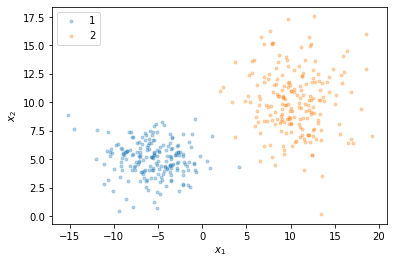

In [3]:
fig1, ax1 = plt.subplots()

ax1.scatter(X1[:, 0], X1[:, 1], marker='.', alpha=0.3, label='1')
ax1.scatter(X2[:, 0], X2[:, 1], marker='.', alpha=0.3, label='2')
ax1.legend()


ax1.set(xlabel='$x_1$', ylabel='$x_2$')
plt.show()

Then, we concatenate them together in one general dataset with $X$ as the input and $y$ as the output.

In [4]:
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

In [5]:
def update_weights(X, y, w, alpha):
    """
    Follows equation 1.3 and 1.6 to update the weight vector w.
    """

    for i in range(len(X)):
        # Define the vector according to the textbook
        x_temp = np.array([[1], [X[i, 0]], [X[i, 1]]]).T

        # Combiner output (Eq. 1.3)
        v = np.matmul(x_temp, w.T)

        # Eq 1.6: weight update
        if (v > 0) and (y[i] == 2):
            w -= alpha * x_temp
        elif (v <= 0) and (y[i] == 1):
            w += alpha * x_temp
    return w

After defining the rules to update the weights, we define the general training loop. We will Given the training data $(\mathbf{X}, \mathbf{y})$

In [6]:
def train(X, y, w, alpha, epochs):
    for i in range(epochs):
        w = update_weights(X, y, w, alpha)
        if i % 100 == 0:
            print("EPOCH: ", i)
    return w

In [7]:
# Define the vector according to the textbook
w = np.array([[0.0], [0.0], [0.0]]).T
alpha = 1e-4    # Learning rate
epochs = 1000

In [8]:
w = train(X, y, w, alpha, epochs)
w = w.squeeze()     # Get rid of unwanted dimensions

EPOCH:  0
EPOCH:  100
EPOCH:  200
EPOCH:  300
EPOCH:  400
EPOCH:  500
EPOCH:  600
EPOCH:  700
EPOCH:  800
EPOCH:  900


### Graph

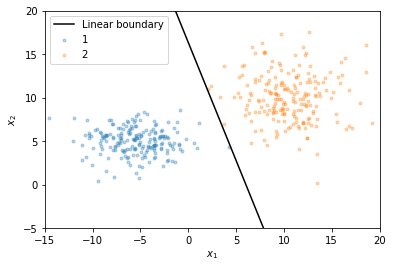

In [9]:
# Determine the boundary line

x_plot = np.linspace(-10, 10)
y_plot = -(w[1] * x_plot + w[0]) / w[2]

# Make the figure

fig2, ax2 = plt.subplots()

ax2.scatter(X1[:, 0], X1[:, 1], marker='.', alpha=0.3, label='1')
ax2.scatter(X2[:, 0], X2[:, 1], marker='.', alpha=0.3, label='2')
ax2.plot(x_plot, y_plot, 'k', label='Linear boundary')

ax2.set(xlabel='$x_1$', ylabel='$x_2$',
        xlim=[-15, 20], ylim=[-5, 20])
ax2.legend()
plt.show()

## Review

In this first example, we introduced the neuron model.